

*Types of Machine Learning:*

* Supervised Machine Learning: It is an ML technique where models are trained on labeled data i.e output variable is provided in these types of problems. Here, the models find the mapping function to map input variables with the output variable or the labels.

Regression and Classification problems are a part of Supervised Machine Learning.

* Unsupervised Machine Learning: It is the technique where models are not provided with the labeled data and they have to find the patterns and structure in the data to know about the data.

Clustering and Association algorithms are a part of Unsupervised ML.

 > PREDICTION ANALYSIS (ECOMMERCE)

## Import

**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plot
%matplotlib inline

customers = pd.read_csv("./data.csv")

customers.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


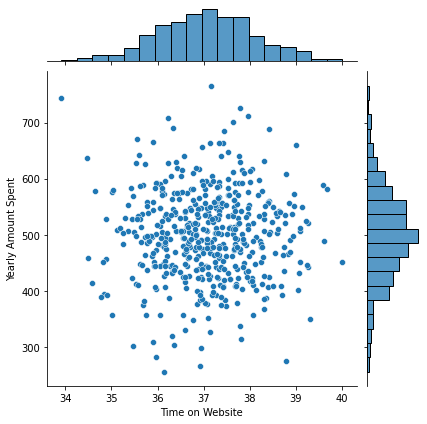

In [5]:
sns.jointplot(x=customers['Time on Website'], y=customers['Yearly Amount Spent'])

**Do same thing with time on App**

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


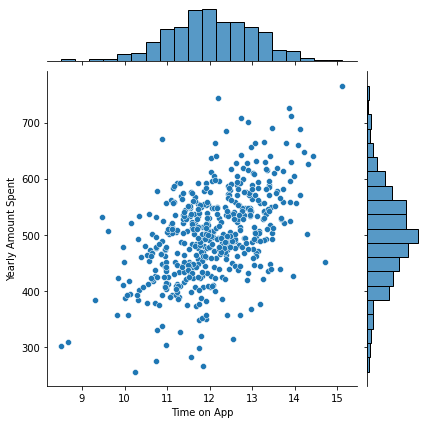

In [6]:
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])

**Use jointplot to create a hex graph comparing both Time on App and Yearly Amount Spent**

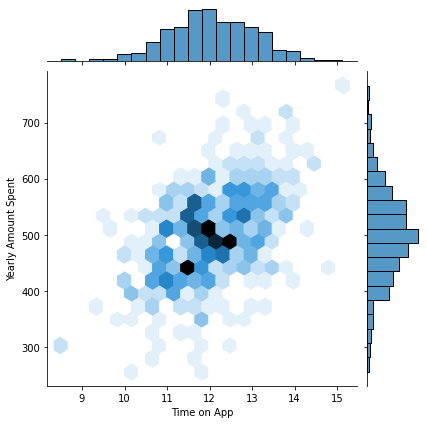

In [7]:
sns.jointplot(x = customers['Time on App'],y = customers['Yearly Amount Spent'],kind='hex')

**Let's explore this type of relationship across the entire dataset**

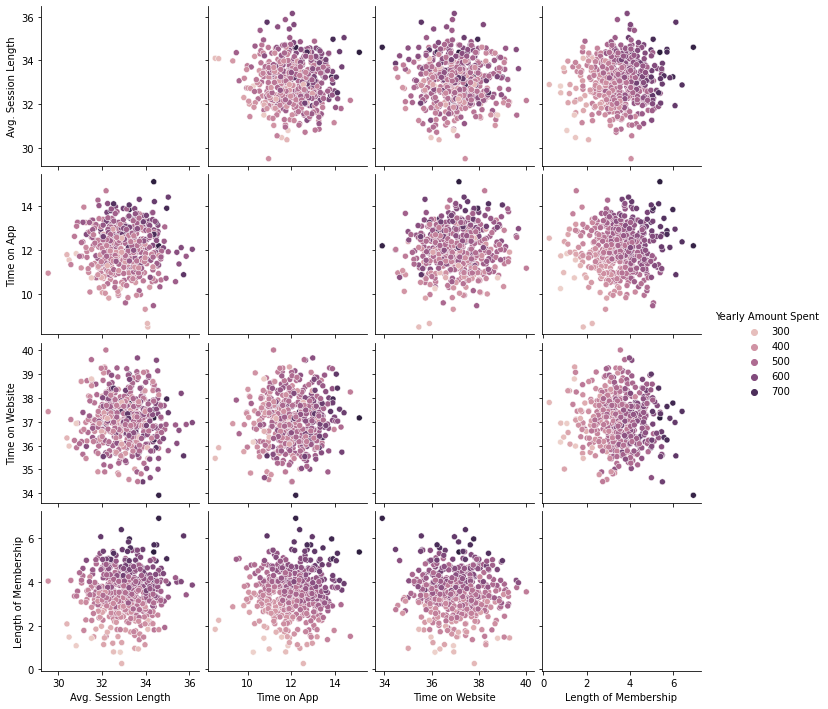

In [18]:
sns.pairplot(customers, hue="Yearly Amount Spent")

**Create a linear model plot of Yearly Amount Spent vs. Length of membership**

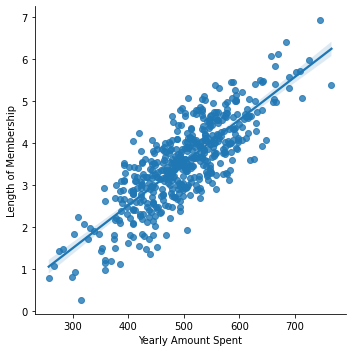

In [9]:
sns.lmplot(x='Yearly Amount Spent',y ='Length of Membership', data=customers)

## Training and Testing Model

Let's split our data into training and testing data sets.

First we create feature set(X) and our target or label entity (Y)

In [10]:
y = customers["Yearly Amount Spent"]

X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

## Split Data Set

Next we use **model_selection.train_test_split** from _sklearn_ to split data into training and test data.

### Parameters

  * `test_size`: This parameter sets the _size of the training dataset_. There are three options: `None`, which is the default, Int, which requires the exact number of samples, and float, which ranges from _0.1 to 1.0_.
  * `train_size`: This parameter specifies the _size of the testing dataset_. The default state suits the training size. It will be set to _0.25_ if the training size is set to default. 
  * `random_state`: The default mode performs a _random split_ using `np.random`. Alternatively, you can add an integer using an exact number.

For this codebase we will be using the following `test_size` as 0.3 and `random_state` as 101

## Training the data

We first import the `LinearRegression` from `linear_model` and then create an instance of her.



Next, we use the `fit` function to train the dataset as show below.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = customers["Yearly Amount Spent"]

X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

lr.fit(X_train, y_train)

print("Lr coefficient ---> ", lr.coef_)

Lr coefficient --->  [25.98154972 38.59015875  0.19040528 61.27909654]


## Next step! -> Predict 

In [12]:
predictions = lr.predict(X_test)

Next create a **scatter plot of the real test values versus the real values**

Text(0, 0.5, 'Predicted Y')

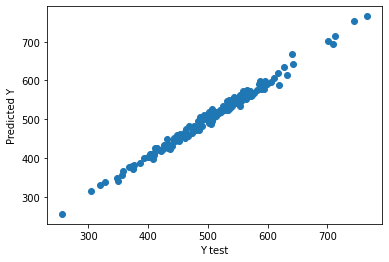

In [13]:
plot.scatter(y_test, predictions)
plot.xlabel('Y test')
plot.ylabel('Predicted Y')


## Evaluating our model

For this evaluation we will be using the below methods for the evaluation:

### Residual Sum of Squares (RSS)

This method is a statistical tech. used to measure the amount of variance in a data set that is not explained by a regression model itself. Instead, it estimates the variance in the residuals or error term.

>Error terms appears in a statistical model, like a regression model, to indicate the uncertainty in the model. The Error term is a residual variable that accounts for a lack of perfect goodness of fit.

The smaller the `RSS` the perfect your model fits, if its zero(0) then your model is perfect.

#### Who used them

This method is used by financial analysts, investors to track investment pricem econometric models etc.

### Explained Variance score

The explained variance is used to measure the proportion of the variablitlty.
Simply put, it is the difference between the expected value and the predicted value.

**Calculate the Mean Abs Error, Mean Sq. Error, and the Root Mean Sq. Error**

In [14]:
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 7.228148653430826
MSE 79.81305165097427
RMSE 8.933815066978624


### Residuals

To quickly explore the residuals to make sure everything was okay with our data.



**Plot a histogram of the residuals and make sure it looks normally distributed**

> We can use seaborn or mtp.hist() function

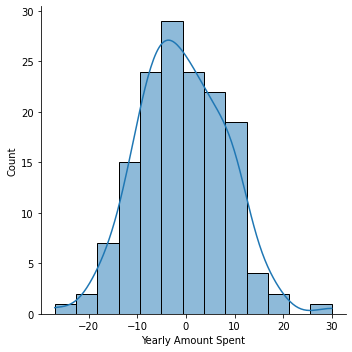

In [15]:
sns.displot(data = (y_test-predictions), kde=True)

### Conclusion

So our aim is to verify if we focus on mobile app or website development.

First, let's recreate the dataframe below

In [16]:
coeffecients = pd.DataFrame(lr.coef_, X.columns)
coeffecients.columns  = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
